In [1]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import itertools
import time


In [2]:
model = Sequential()  
a=[]

In [3]:
class Onehot2Int(object):
    """To plot the decision boundary"""
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [4]:
def theOriginalNN(X,Y):
    """
    The NN model which we will train and get the weights for the new
    NN model
    """    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    

    feature_vector_shape = len(X_train[0])
    input_shape = (feature_vector_shape,)
#     print("Input shape",input_shape)
#     print(f'Feature shape: {input_shape}')
    
    model.add(Dense(2,input_shape=input_shape, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))  


 
    es = [EarlyStopping(monitor='loss', mode='min', verbose=0, patience=500)]

    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
   

    print("Weights and biases of the layers before training the model: \n")
    #a=[]
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
            #a=np.append(layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

#     print(X_train.shape,Y_train.shape)
#     print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_tr = Y_train
    Y_train = to_categorical(Y_train)
#     print(Y_train.shape)
    Y_test = to_categorical(Y_test)
    
   
    e = 500   #The number of epochs
    #obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, callbacks=es)
    obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, epochs = e)
    
    print("Weights and biases of the layers after training the model: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
        
    #predict
    # pred = model.predict(X_train)
    # print("After Prediction of model", pred)
   
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Loss = np.transpose(Loss)
    print(Loss.shape)
    #print(Loss.shape)
    hist = obj.history["accuracy"]
    #n_epochs_best = np.argmax(hist)
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    graph_it(Loss, Epoch, Accuracy,scores,X_train, X_test, Y_train, Y_test, Y_tt)


In [5]:
def graph_it(Loss, Epoch, Accuracy,scores,X_train, X_test, Y_train, Y_test,Y_tt):
    """
    Creating all the graphs:
    1. Loss vs Epoch
    2. Accuracy vs Epoch
    3. The decision boundarys
    """
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    # Plot decision boundary
    keras_model_no_ohe = Onehot2Int(model)

    # Plot decision boundary
    
    plt.figure(figsize=(10,7))
    plot_decision_regions(X_test, Y_tt, clf=keras_model_no_ohe, legend=2)
    plt.show()
    
    

In [6]:
def theNewNN(X,Y):
    """
    The NN model which will be trained by the weights 
    we got by the OriginalNN()
    """
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    # es = EarlyStopping(monitor='loss', mode='min', verbose=0, patience=50)

    # model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
    
#     print(X_train.shape,Y_train.shape)
#     print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_train = to_categorical(Y_train)
#     print(Y_train.shape)
    Y_test = to_categorical(Y_test)
    

    
    # Setting new weights and biases
    # for layer in model.layers:
    #     a,b = layer.get_weights()[0].shape
    #     layer.set_weights([np.random.randn(a,b), np.ones(layer.get_weights()[1].shape)])
    
    #Get the original weights
    a=[]
    for layer in model.layers:
        a = np.append(a,layer.get_weights()[0])

        
    es = [EarlyStopping(monitor='loss', mode='min', verbose=0, patience=500)]

    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'], loss_weights = a)

    print("Weights and biases of the layers after setting the new weights and biases: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
   
    e = 5000   #The number of epochs
    #obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, callbacks=es)
    obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, epochs=e)
    
    print("Weights and biases of the layers after setting the new weights and biases: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
    print("Bias")
    print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
    
    
    #predict
#     pred = model.predict(X_train)
#     print("After Prediction of model", pred)
    
    scores = model.evaluate(X_test, Y_test)
    L = np.array(obj.history["loss"])
    
    E = np.arange(e)
    A = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    graph_it(L, E, A,scores,X_train, X_test, Y_train, Y_test, Y_tt)


    



In [7]:
#Old Dataset
def OldDataset():
    """
    The dataset for the original model
    """
    #Class 1
    mean = [5,5]
    cov = [[10,0],
           [0,10]] 
    Class1 = np.random.multivariate_normal(mean,cov,1000)

    #Class 2
    mean = [-5,5]
    cov = [[10,0],
           [0,10]] 
    Class2 = np.random.multivariate_normal(mean,cov,1000)    
    

    X = np.vstack([Class1, Class2])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    theOriginalNN(X,Y)
    

In [8]:
#New Dataset
def NewDataset(i):
    """
    The dataset for the new model
    """
    #Class 3
    mean = [i,i]
    cov = [[50,0],
           [0,50]] 
    Class3 = np.random.multivariate_normal(mean,cov,1000)

    #Class 4
    mean = [(-i),i]
    cov = [[50,0],
           [0,50]] 
    Class4 = np.random.multivariate_normal(mean,cov,1000)
    
    X = np.vstack([Class3, Class4])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    
    
    theNewNN(X,Y)

****************************The Original NN*************************************


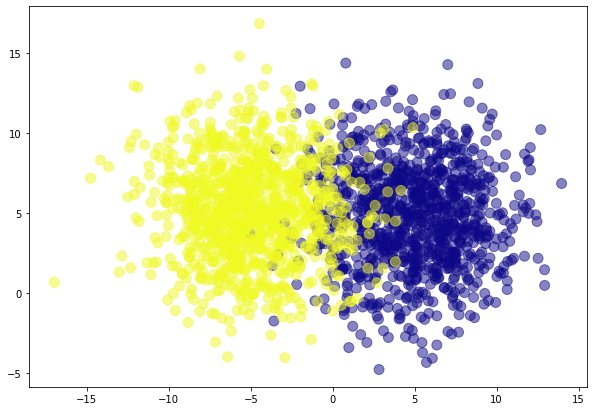

Weights and biases of the layers before training the model: 

dense
Weights
Shape:  (2, 2) 
 [[ 0.3821652  -0.44758028]
 [ 0.40059304  1.1988121 ]]
Bias
Shape:  (2,) 
 [0. 0.] 

dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  8.5975838e-01 -5.7312822e-01  3.6458516e-01]
 [-5.8884501e-01 -9.2260814e-01  3.3511376e-01  6.6294575e-01]]
Bias
Shape:  (4,) 
 [0. 0. 0. 0.] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.8728168   0.295604  ]
 [-0.6917579   0.4327855 ]
 [-0.5748844  -0.14472532]
 [-0.12783527  0.5108738 ]]
Bias
Shape:  (2,) 
 [0. 0.] 

Weights and biases of the layers after training the model: 

dense
Weights
Shape:  (2, 2) 
 [[ 0.2060465  -0.7048595 ]
 [ 0.26411813  0.50666517]]
Bias
Shape:  (2,) 
 [0.19003916 2.0629084 ] 

dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  9.5230967e-01 -1.0815518e+00  2.8295431e-01]
 [-5.8884501e-01 -8.7465513e-01  4.7405863e-01  2.1586509e-01]]
Bias
Shape:  (4,) 
 [0.         0.32151616 0.5517499  0.04815098] 

dense_2
Weights
Shape:  (4, 2) 
 

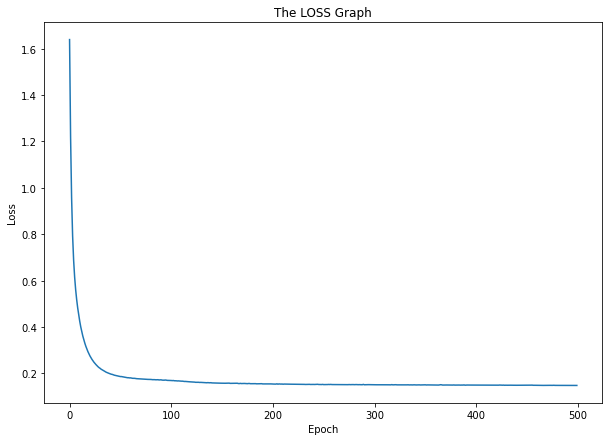

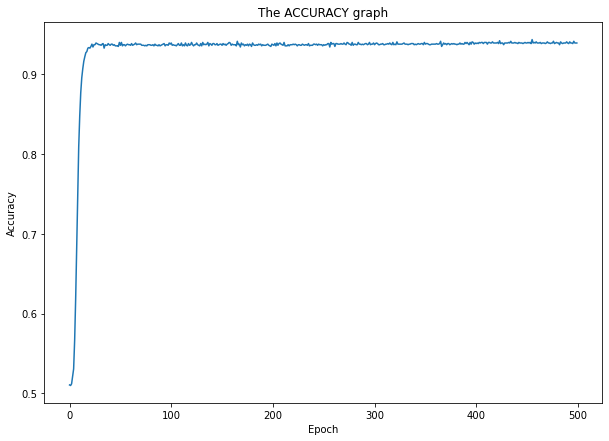

Test results - Loss: 0.16436567902565002 - Accuracy: 93.66666674613953%


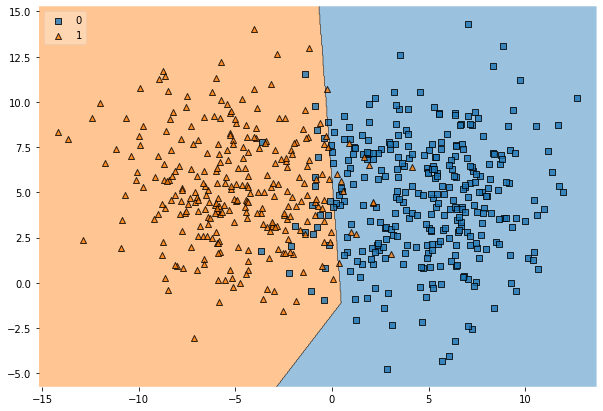


**************************The  4.0  NN************************************


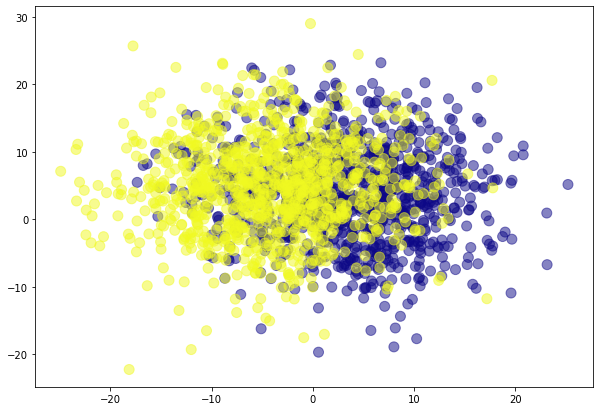

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[ 0.2060465  -0.7048595 ]
 [ 0.26411813  0.50666517]]
Bias
Shape:  (2,) 
 [0.19003916 2.0629084 ] 

dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  9.5230967e-01 -1.0815518e+00  2.8295431e-01]
 [-5.8884501e-01 -8.7465513e-01  4.7405863e-01  2.1586509e-01]]
Bias
Shape:  (4,) 
 [0.         0.32151616 0.5517499  0.04815098] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.8728168   0.295604  ]
 [ 0.74846685 -1.0074416 ]
 [-1.3135662   0.5939551 ]
 [ 0.16120546  0.22183262]]
Bias
Shape:  (2,) 
 [ 1.0624471 -1.0624473] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-210.90616   214.52414 ]
 [  14.657876  198.37755 ]]
dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  2.1550099e+02 -3.2417725e+01 -3.2466576e+01]
 [-5.8884501e-01 -8.9689384e+01  2.2047104e+02  2.2077893e+02]]
dense_2
Weights
Shape:  (4, 2) 
 [[  -0.8728168    0

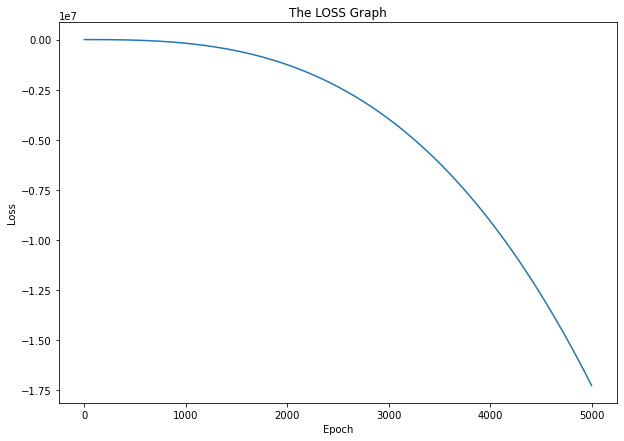

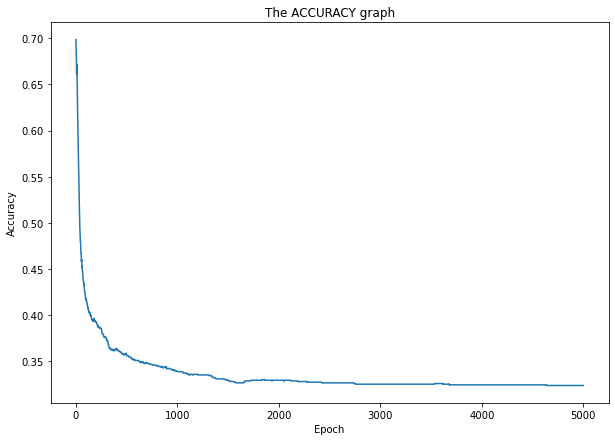

Test results - Loss: -18283832.0 - Accuracy: 33.33333432674408%


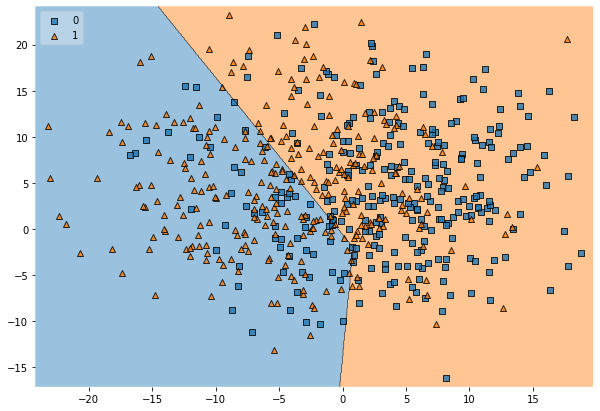


**************************The  6.6  NN************************************


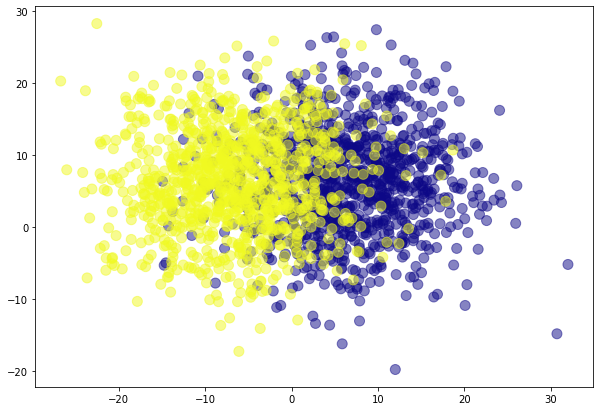

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-210.90616   214.52414 ]
 [  14.657876  198.37755 ]]
Bias
Shape:  (2,) 
 [204.28745 222.70027] 

dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  2.1550099e+02 -3.2417725e+01 -3.2466576e+01]
 [-5.8884501e-01 -8.9689384e+01  2.2047104e+02  2.2077893e+02]]
Bias
Shape:  (4,) 
 [  0.      201.93845 218.58167 218.63647] 

dense_2
Weights
Shape:  (4, 2) 
 [[  -0.8728168    0.295604 ]
 [ 216.38173   -216.64082  ]
 [-221.68605    220.96654  ]
 [-220.27512    220.65814  ]]
Bias
Shape:  (2,) 
 [-160.94781  160.94781] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-103.73294      7.570714 ]
 [ -78.58933     -1.3924377]]
dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0315674e+01  9.3056709e+01  9.2935776e+01]
 [-5.8884501e-01 -3.4549507e+01  1.2158766e+01  1.2503690e+01]]
dense_2
Weights
Shape:  (4, 2) 
 [[ -0.8728168

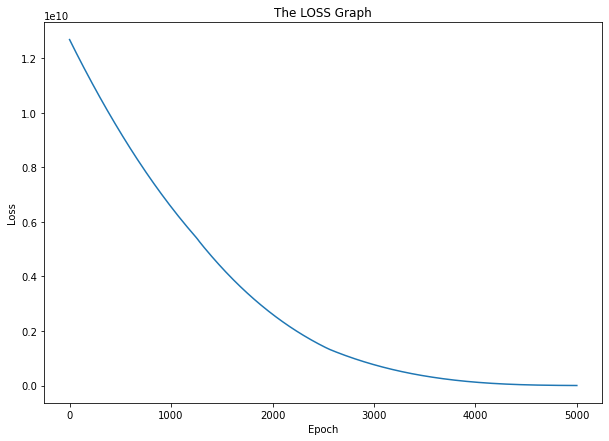

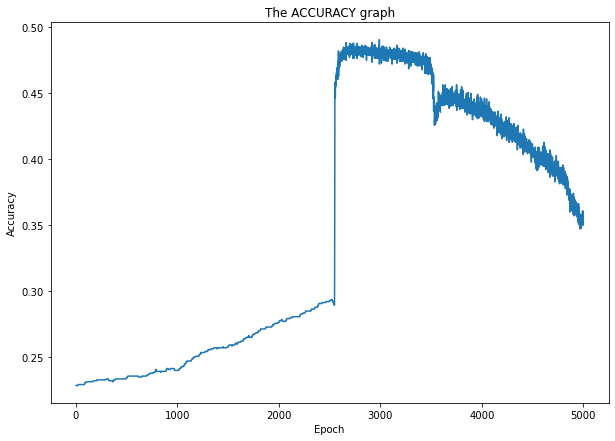

Test results - Loss: 1546692.75 - Accuracy: 34.99999940395355%


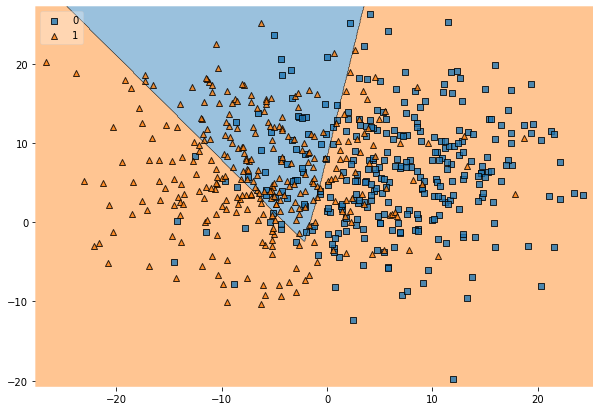


**************************The  9.2  NN************************************


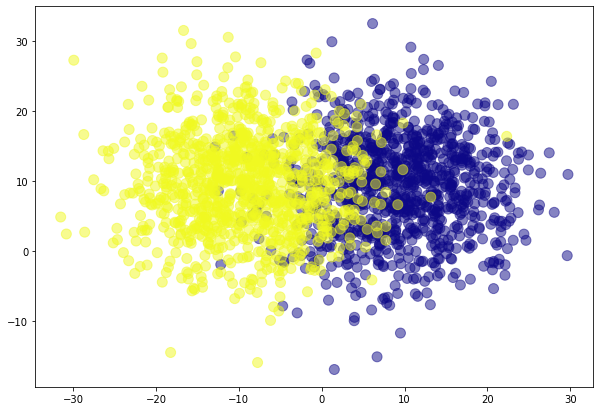

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-103.73294      7.570714 ]
 [ -78.58933     -1.3924377]]
Bias
Shape:  (2,) 
 [61.19677  12.861404] 

dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0315674e+01  9.3056709e+01  9.2935776e+01]
 [-5.8884501e-01 -3.4549507e+01  1.2158766e+01  1.2503690e+01]]
Bias
Shape:  (4,) 
 [ 0.       68.267685 18.00934  18.077108] 

dense_2
Weights
Shape:  (4, 2) 
 [[ -0.8728168   0.295604 ]
 [ 70.09972   -70.35887  ]
 [-27.488203   26.768476 ]
 [-25.867365   26.250263 ]]
Bias
Shape:  (2,) 
 [ 28.669006 -28.669006] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-5.2289379e+01 -1.0477863e-03]
 [-4.9073914e+01 -2.4974308e-04]]
dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0037186e+01  9.3325455e+01  9.3204308e+01]
 [-5.8884501e-01 -2.6136131e+01  1.7780306e+00  2.1247673e+00]]
dense_2
Weights
Shape:  (4, 2) 
 [[ -0.872

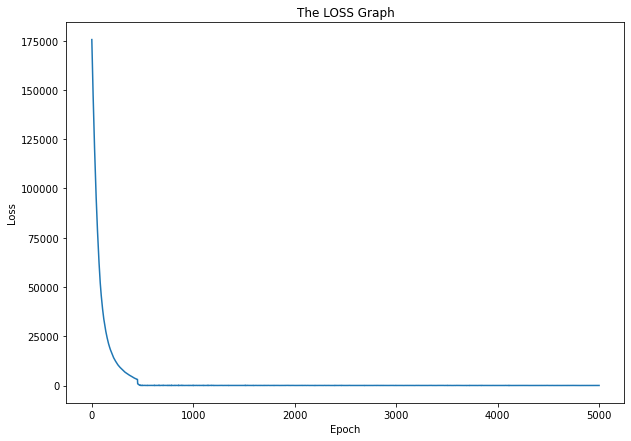

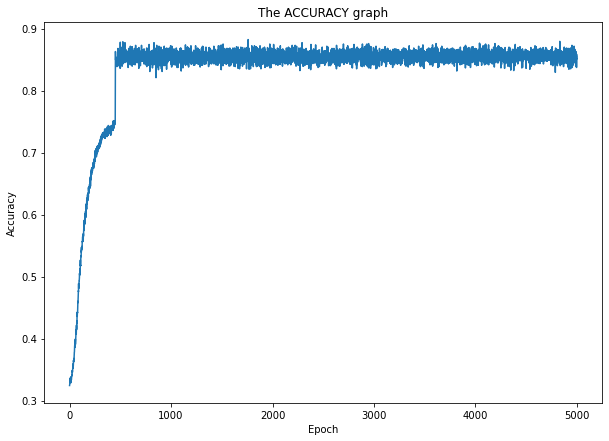

Test results - Loss: 11.955448150634766 - Accuracy: 87.33333349227905%


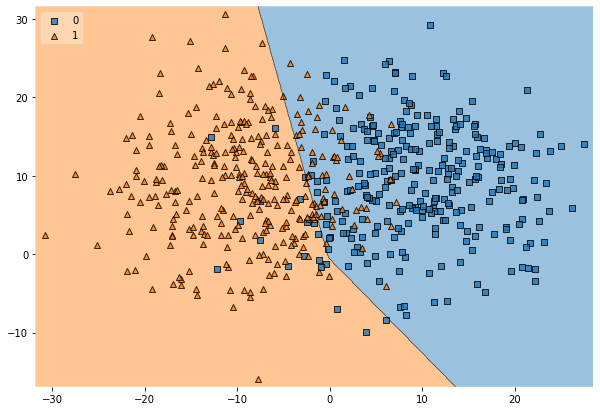


**************************The  11.799999999999999  NN************************************


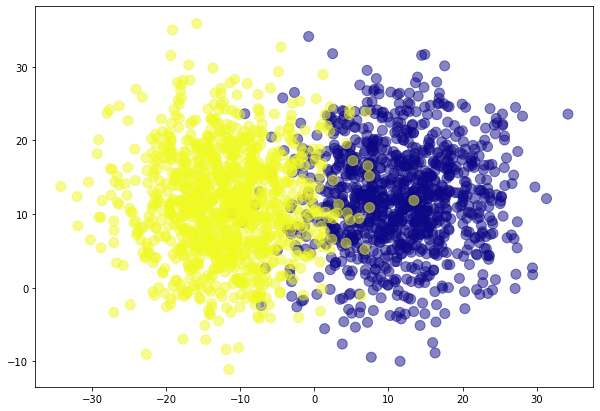

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-5.2289379e+01 -1.0477863e-03]
 [-4.9073914e+01 -2.4974308e-04]]
Bias
Shape:  (2,) 
 [-31.46771     1.0203229] 

dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0037186e+01  9.3325455e+01  9.3204308e+01]
 [-5.8884501e-01 -2.6136131e+01  1.7780306e+00  2.1247673e+00]]
Bias
Shape:  (4,) 
 [ 0.       49.184578 28.305544 28.373535] 

dense_2
Weights
Shape:  (4, 2) 
 [[ -0.8728168   0.295604 ]
 [ 69.42346   -69.68262  ]
 [-27.02434    26.304613 ]
 [-25.376547   25.759447 ]]
Bias
Shape:  (2,) 
 [ 18.374006 -18.37401 ] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.4924983e+01 -7.7874365e-04]
 [-2.4685608e+01  1.4377153e-04]]
dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0034798e+01  9.3323570e+01  9.3202271e+01]
 [-5.8884501e-01 -2.5007664e+01  6.4839351e-01  9.9511170e-01]]
dense_2
Weights
Shape:  (4, 2)

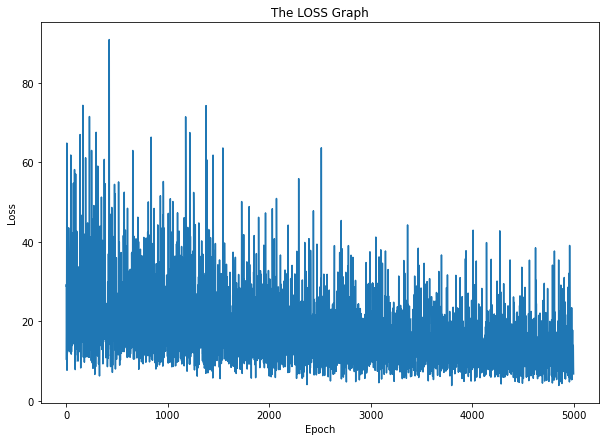

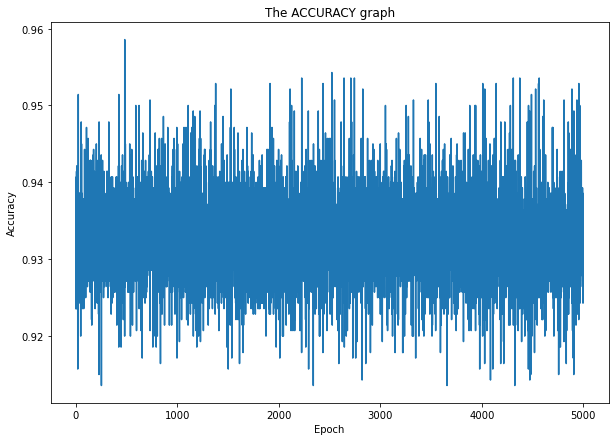

Test results - Loss: 4.789818286895752 - Accuracy: 93.99999976158142%


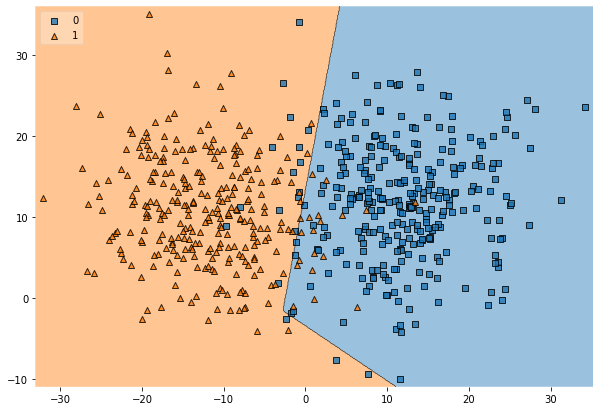


**************************The  14.399999999999999  NN************************************


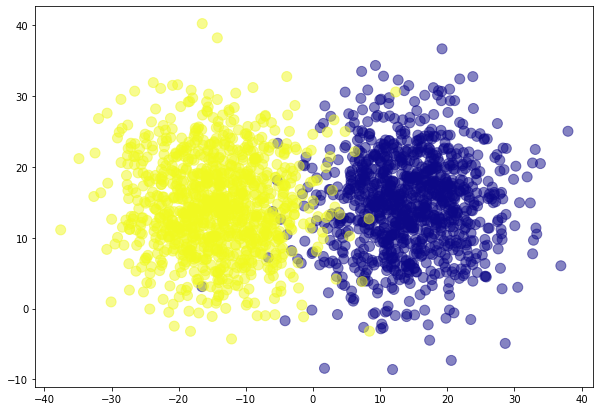

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.4924983e+01 -7.7874365e-04]
 [-2.4685608e+01  1.4377153e-04]]
Bias
Shape:  (2,) 
 [-80.040016    1.0921478] 

dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0034798e+01  9.3323570e+01  9.3202271e+01]
 [-5.8884501e-01 -2.5007664e+01  6.4839351e-01  9.9511170e-01]]
Bias
Shape:  (4,) 
 [ 0.       49.109142 28.38     28.447947] 

dense_2
Weights
Shape:  (4, 2) 
 [[ -0.8728168   0.295604 ]
 [ 69.411514  -69.67066  ]
 [-27.022934   26.303204 ]
 [-25.375029   25.757929 ]]
Bias
Shape:  (2,) 
 [ 18.298792 -18.298794] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.4961696e+01 -3.3471652e-03]
 [-1.3863569e+01 -5.5293023e-04]]
dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0013550e+01  9.3342941e+01  9.3221588e+01]
 [-5.8884501e-01 -2.3625282e+01 -7.3588294e-01 -3.8921222e-01]]
dense_2
Weights
Shape:  (4, 2)

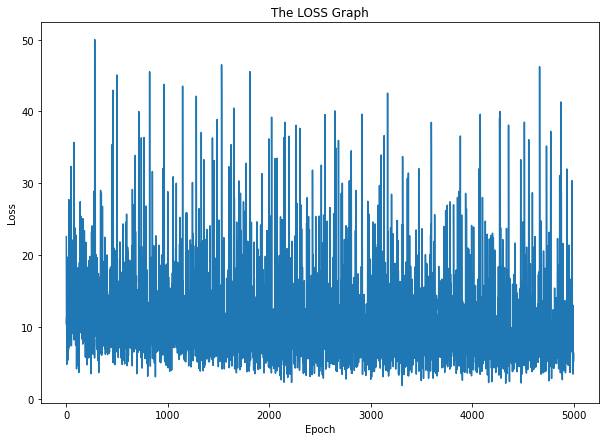

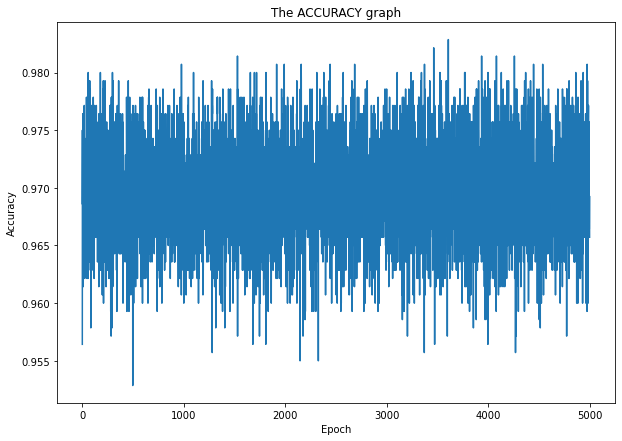

Test results - Loss: 339.59979248046875 - Accuracy: 95.6666648387909%


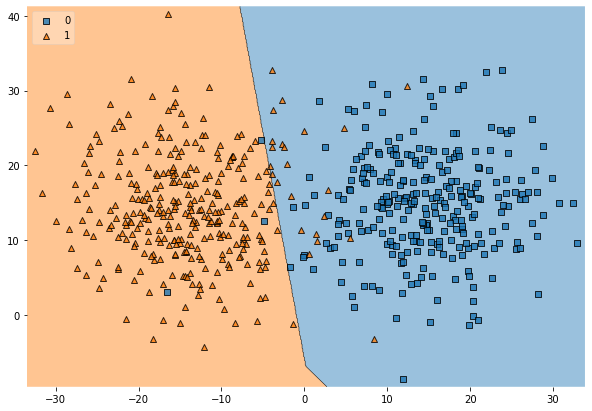


**************************The  17.0  NN************************************


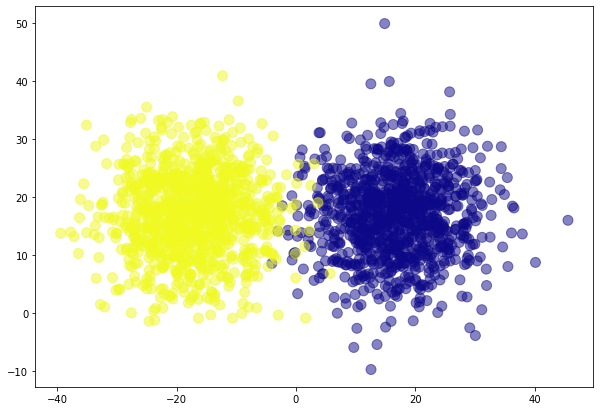

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.4961696e+01 -3.3471652e-03]
 [-1.3863569e+01 -5.5293023e-04]]
Bias
Shape:  (2,) 
 [-92.133446    1.1819701] 

dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0013550e+01  9.3342941e+01  9.3221588e+01]
 [-5.8884501e-01 -2.3625282e+01 -7.3588294e-01 -3.8921222e-01]]
Bias
Shape:  (4,) 
 [ 0.       49.0144   28.472351 28.540243] 

dense_2
Weights
Shape:  (4, 2) 
 [[ -0.8728168   0.295604 ]
 [ 68.33924   -68.59839  ]
 [-27.086018   26.366287 ]
 [-25.427132   25.810032 ]]
Bias
Shape:  (2,) 
 [ 18.205223 -18.205227] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.4961696e+01 -2.2482078e-03]
 [-1.3863569e+01 -4.9833168e-04]]
dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0013550e+01  9.3342941e+01  9.3221588e+01]
 [-5.8884501e-01 -2.2204224e+01 -2.1614511e+00 -1.8149046e+00]]
dense_2
Weights
Shape:  (4, 2)

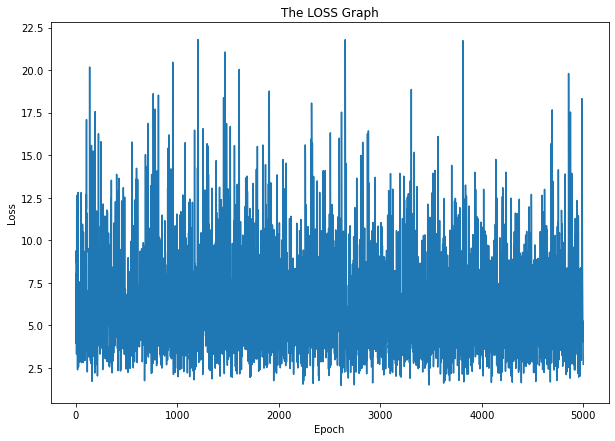

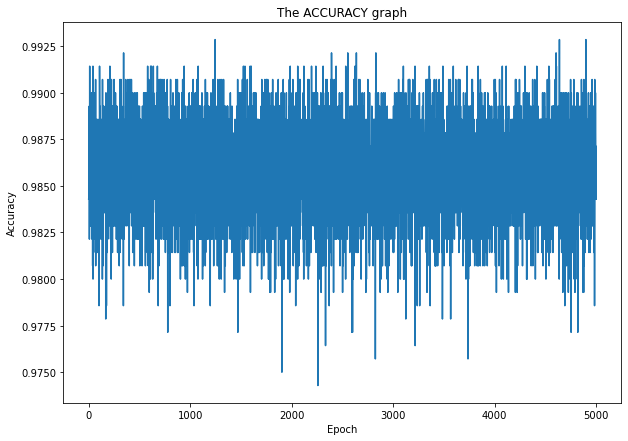

Test results - Loss: 7.210287570953369 - Accuracy: 95.99999785423279%


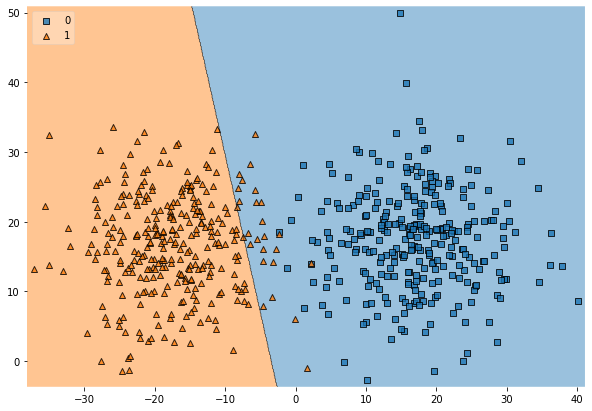


**************************The  19.599999999999998  NN************************************


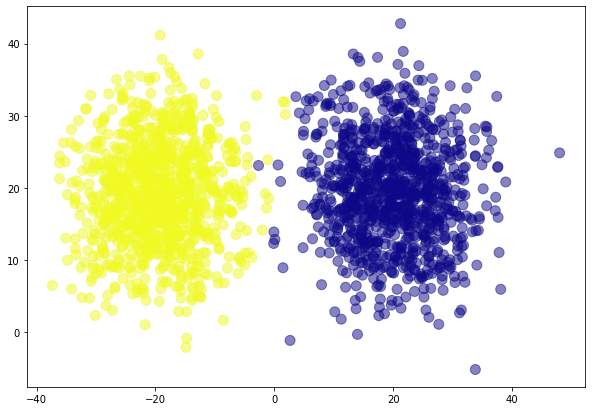

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.4961696e+01 -2.2482078e-03]
 [-1.3863569e+01 -4.9833168e-04]]
Bias
Shape:  (2,) 
 [-92.133446    1.2749586] 

dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0013550e+01  9.3342941e+01  9.3221588e+01]
 [-5.8884501e-01 -2.2204224e+01 -2.1614511e+00 -1.8149046e+00]]
Bias
Shape:  (4,) 
 [ 0.       48.915066 28.567587 28.635338] 

dense_2
Weights
Shape:  (4, 2) 
 [[ -0.8728168   0.295604 ]
 [ 66.17016   -66.429306 ]
 [-27.280428   26.560698 ]
 [-25.59607    25.978968 ]]
Bias
Shape:  (2,) 
 [ 18.107138 -18.10714 ] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.4961696e+01 -2.7638691e-02]
 [-1.3863569e+01  8.0668097e-03]]
dense_1
Weights
Shape:  (2, 4) 
 [[-7.6580048e-04  7.0013550e+01  9.3342941e+01  9.3221588e+01]
 [-5.8884501e-01 -2.0301020e+01 -4.0703239e+00 -3.7239113e+00]]
dense_2
Weights
Shape:  (4, 2)

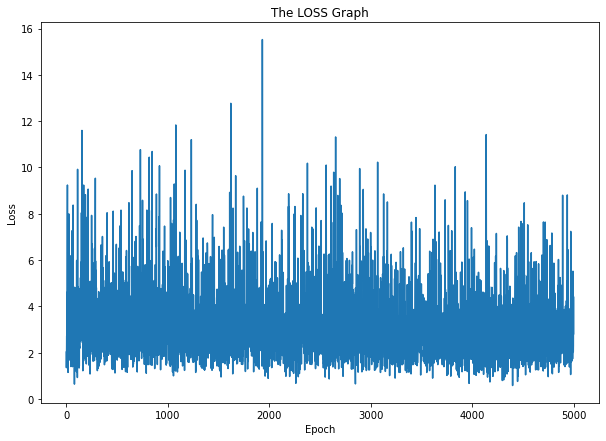

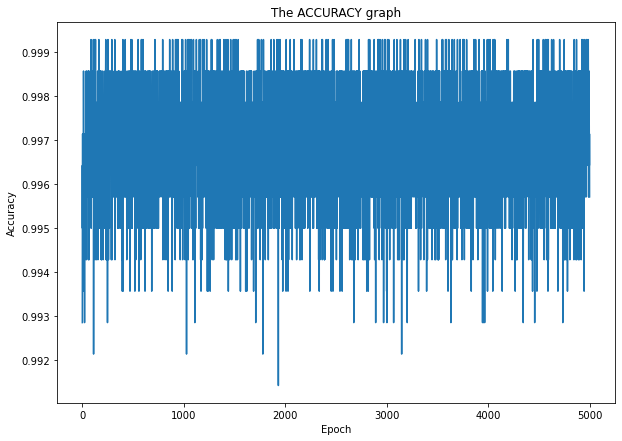

Test results - Loss: 1.3857805728912354 - Accuracy: 99.83333349227905%


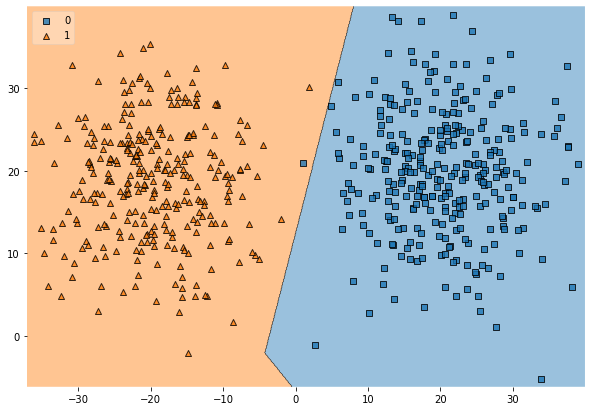

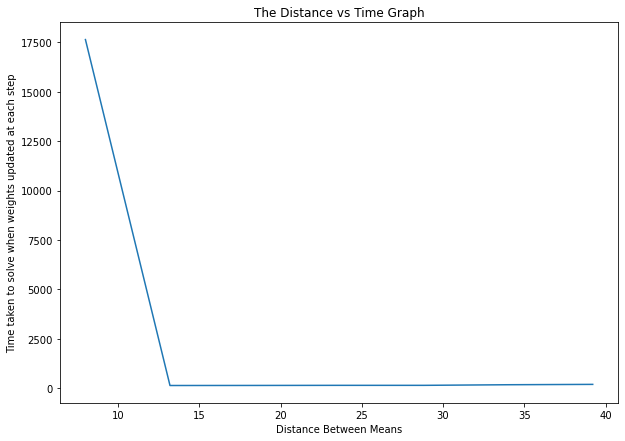

In [9]:
def main():
    dist = []
    timeArr = []
    print("****************************The Original NN*************************************")
    OldDataset()
    for i in np.arange(4,20,2.6): 
        print("\n**************************The ",i," NN************************************")
        begin = time.time()
        NewDataset(i)
        end = time.time()
        m1=np.array((i,i))
        m2 = np.array(((-i),i))
        dist = np.append(dist,[np.linalg.norm(m1-m2)])
        #time.sleep(1)
        timeArr = np.append(timeArr,[end-begin])
    
    plt.figure(figsize=(10,7))
    plt.plot(dist, timeArr)
    plt.xlabel("Distance Between Means")
    plt.ylabel("Time taken to solve when weights updated at each step")
    plt.title("The Distance vs Time Graph")
    plt.show()
        
        
    
    
#     print("****************************THE NEW NN**********************************")
#     NewDataset(4,a)
    
if __name__ == "__main__":
    main()